Explanations/visualisations for the bits in the straightening notebook

In [1]:
%load_ext autoreload
%autoreload 2

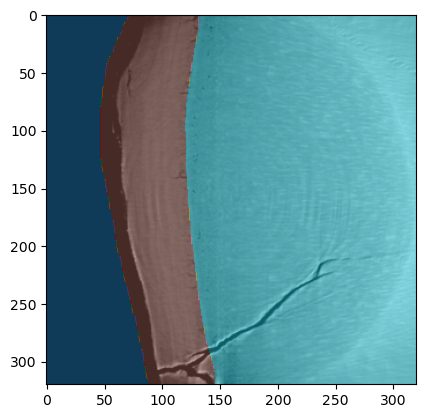

In [2]:
"""
Open an image and mask

"""
import pickle
import matplotlib.pyplot as plt

with open("cementum_data.pickle", "rb") as data:
    _, _, test_images, test_masks = pickle.load(data)


# Just pick the first image for now
image, mask = test_images[0], test_masks[0]
plt.imshow(image, cmap="grey")
plt.imshow(mask, cmap="tab10", alpha=0.5)

In [3]:
"""
Convert the masks from integers to uint8

"""
import numpy as np

assert (np.unique(mask) == [0, 1, 2]).all()

normalised_mask = (
    (mask - np.min(mask)) * 255.0 / (np.max(mask) - np.min(mask))
).astype(np.uint8)

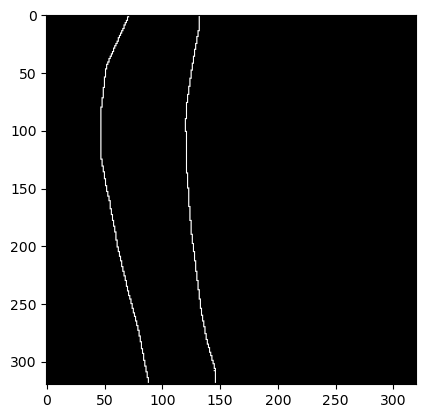

In [4]:
"""
Show the mask edge identification

"""
from cementum import straighten

# Find edges
edges = straighten.find_edges(normalised_mask)

# Choose a value above which to consider an edge
edge_threshold = 10
edges[edges >= edge_threshold] = 1.0
plt.imshow(edges, cmap="grey")


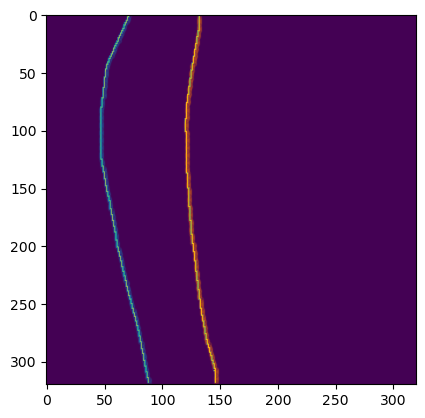

In [5]:
"""
Show how we identify the first and second edge

"""
first_edge, second_edge = straighten._identify_edges(edges)

plt.imshow(edges)
plot_kw = {"marker": ".", "alpha": 0.1}
plt.plot(first_edge[:, 0], first_edge[:, 1], **plot_kw)
plt.plot(second_edge[:, 0], second_edge[:, 1], **plot_kw)


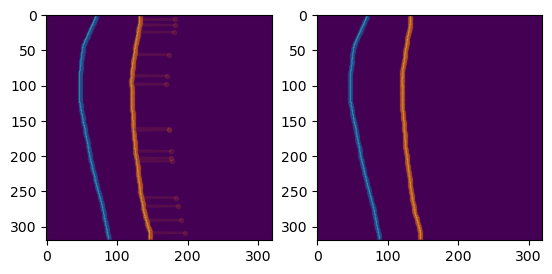

In [6]:
"""
Show the mask edge smoothing

TODO I think this should perform better

"""
gen = np.random.default_rng(0)


# Introduce some bumps
bump_indices = gen.integers(0, len(second_edge), size=15)
bumpy_edge = second_edge.copy()
for i in bump_indices:
    bumpy_edge[i, 0] += 50

# Smooth the edge
smoothed_edge = straighten._correct_jumps(bumpy_edge, threshold=30)

# Plot
fig, axes = plt.subplots(1, 2)
for axis in axes:
    axis.imshow(edges)
    axis.plot(first_edge[:, 0], first_edge[:, 1], **plot_kw)

axes[0].plot(bumpy_edge[:, 0], bumpy_edge[:, 1], **plot_kw)
axes[1].plot(smoothed_edge[:, 0], smoothed_edge[:, 1], **plot_kw)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


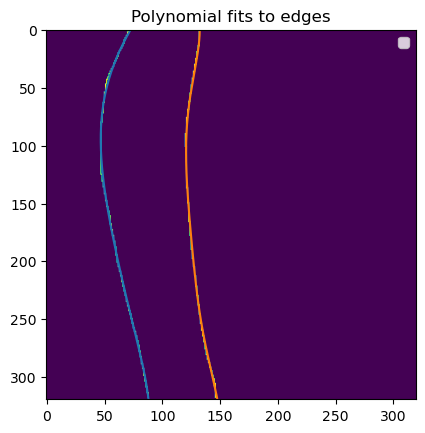

In [7]:
"""
Fit a polynomial to the smoothed edges

"""
plt.imshow(edges)

poly_degree = 6

first_poly = straighten._fit_polynomial(first_edge, poly_degree)
second_poly = straighten._fit_polynomial(smoothed_edge, poly_degree)

y_vals = np.arange(0, image.shape[0])

plt.plot(first_poly(y_vals), y_vals)
plt.plot(second_poly(y_vals), y_vals)

plt.title("Polynomial fits to edges")
plt.legend()